### Gege Li
# Module 2 Assignment: Cross Validating a Linear Regression Model

In [1]:
#load all the library that are needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

## 1. Introduction
The problem here is the prediction of full load electrical power output of a base load operated combined cycle power plant. 

In order to solve this question, I plan to do some exploratory data analysis, including the histogram distribution of all variables and scatter plot to show the relationship between each variable and hourly electrical energy output. 

Then I'm going to predict the hourly electrical energy output by constructing several linear regression models. Each model includes at least 2 explanatory variables and increases by degrees until full variables(which is four). 

At last, evaluate them by using K-fold cross validation.
## 2. Exploratory Data Analysis
__This part contains four parts: (a)Describe, (b)Histogram Plots, (c)Correlation Scatter Plot, and (d)Correlation Heatmap.__

First of all, read the dataset.

In [2]:
#read the data set from Github repository and load it into a Pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-6150/master/M2_Data.csv')
df.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
#df.rename(columns = {'T':'Temperature', 'V':'Exhaust Vacuum',
#                    'AP':'Ambient Pressure', 'RH':'Relative Humidity', 
#                   'EP':'Hourly Electrical Energy Output'}, inplace = True) 
#df.head()

##### (a) Exploratory Data Analysis --- Describe

In [4]:
#print the data information
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
T     9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
EP    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


Here we can see that all the columns are non-null. So we don't need to do more data clean and preparation.

In [5]:
#describe all the columns in the dataset
df.describe()

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Here we can see all the means, std, min, max and ect measure for the five columns. That will help us do further analysis.

Depends on that chart, then I will show the distribution of each variable by using histogram.
##### (b) Exploratory Data Analysis --- Histogram

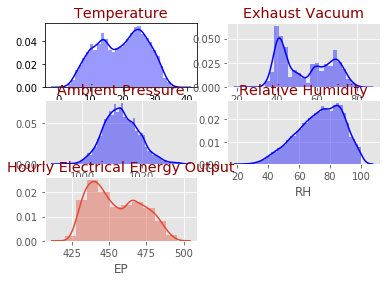

In [6]:
#Exploratory Data Analysis --- Histogram

#show the distribution of Temperature
plt.subplot(3,2,1)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,15)
plt.title('Temperature', color="darkred")
sns.distplot(df['T'], color = 'blue')

#show the distribution of Exhaust Vacuum
plt.subplot(3,2,2)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,15)
plt.title('Exhaust Vacuum', color="darkred")
sns.distplot(df['V'], color = 'blue')

#show the distribution of Ambient Pressure
plt.subplot(3,2,3)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,15)
plt.title('Ambient Pressure', color="darkred")
sns.distplot(df['AP'], color = 'blue')

#show the distribution of Relative Humidity
plt.subplot(3,2,4)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,15)
plt.title('Relative Humidity', color="darkred")
sns.distplot(df['RH'], color = 'blue')

#show the distribution of Hourly Electrical Energy Output
plt.subplot(3,2,5)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,15)
plt.title('Hourly Electrical Energy Output', color="darkred")
sns.distplot(df['EP'], bins=10)

plt.show()

From the hisrogram plots we can see:
- Ambient Pressure(AP) is approximately normally distributed.
- Relative Humidity(RH) is a little Left Skewed.
- The attribute scales are different.

##### (c) Exploratory Data Analysis --- Correlation Scatter Plot
In order to identify such relationships between the explanatory variables and the response variable, I will try to identify some preliminary predictive inferences by using scatter plot to show the relationship.

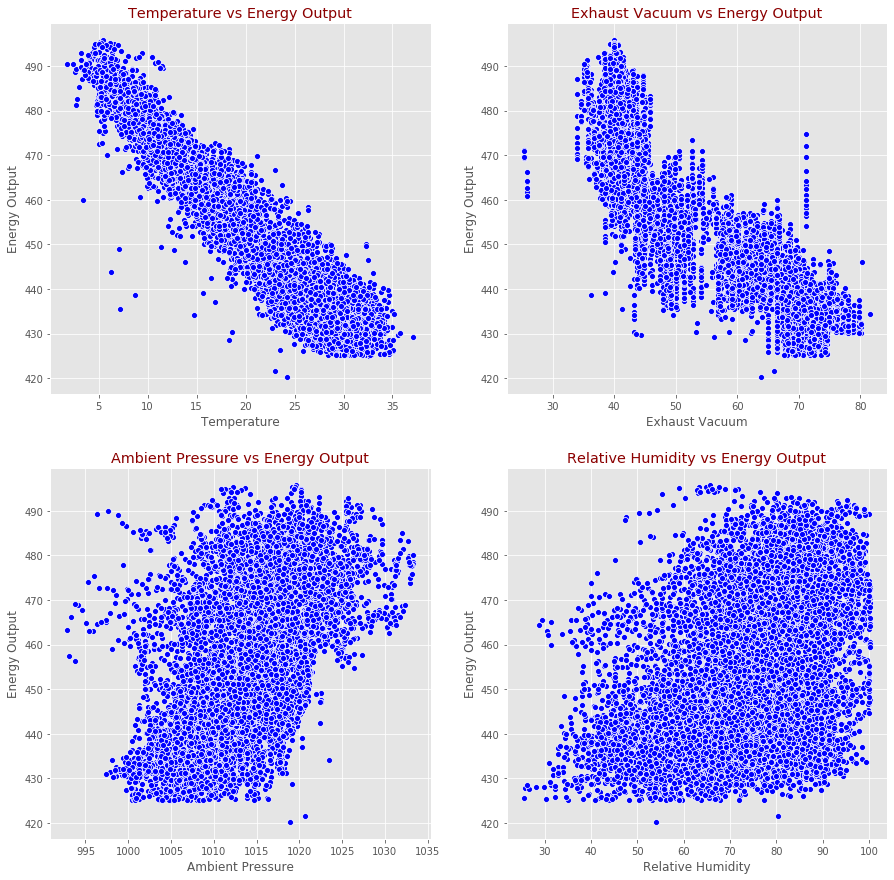

In [7]:
#Exploratory Data Analysis --- Correlation Scatter Plot

#Correlation between power output and temperature
plt.subplot(2,2,1)
sns.scatterplot(x ='T', y = 'EP', data=df, color ="b")
plt.rcParams['figure.figsize'] = (15,10)
plt.title("Temperature vs Energy Output", color="darkred")
plt.xlabel("Temperature") 
plt.ylabel("Energy Output")

#Correlation between power output and Exhaust Vacuum
plt.subplot(2,2,2)
sns.scatterplot(x ='V', y = 'EP', data=df, color ="b")
plt.rcParams['figure.figsize'] = (15,10)
plt.title("Exhaust Vacuum vs Energy Output", color="darkred")
plt.xlabel("Exhaust Vacuum") 
plt.ylabel("Energy Output")

#Correlation between power output and Ambient Pressure
plt.subplot(2,2,3)
sns.scatterplot(x ='AP', y = 'EP', data=df, color ="b")
plt.rcParams['figure.figsize'] = (15,10)
plt.title("Ambient Pressure vs Energy Output", color="darkred")
plt.xlabel("Ambient Pressure") 
plt.ylabel("Energy Output")

#Correlation between power output and Relative Humidity
plt.subplot(2,2,4)
sns.scatterplot(x ='RH', y = 'EP', data=df, color ="b")
plt.rcParams['figure.figsize'] = (15,10)
plt.title("Relative Humidity vs Energy Output", color="darkred")
plt.xlabel("Relative Humidity") 
plt.ylabel("Energy Output")

plt.show()

From the scatter plots we can see:
- There is a strong linear correlation between Temperature(T) and Energy Output(EP).
- Following is Exhaust Vacuum(V) and Energy Output(EP), a less strong relationship.
- Ambient Pressure(AP) and Relative Humidity(RH) have no such strong relationship with Energy Output(EP).

##### (d) Exploratory Data Analysis --- Correlation Heatmap

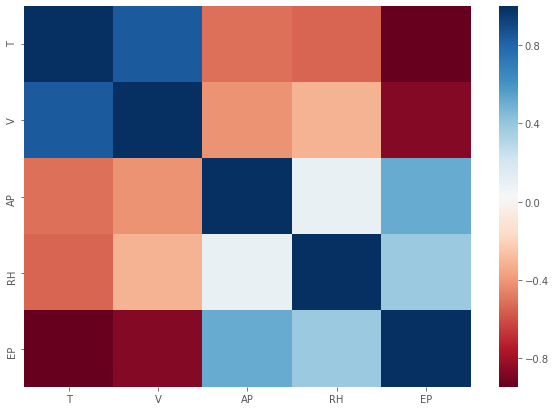

In [8]:
# correlation heatmap 
corr = df.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr, cmap="RdBu", xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

From the correlation heatmap we can see:
- The target is correlated with the features.
- There have multi-collinearity problem because of the correlation among the features.

## 3. Regression Model Construction & Evaluation 
__This part contains four models and each model has evaluation.__

Firstly, separated the response variable(EP) from the explanatory variables.

In [9]:
# move the response variable (in this case "EP:Hourly Electrical Energy Output") to a separate variable
y = df.EP

In [10]:
# check results
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: EP, dtype: float64

In [11]:
#preserve the original dataframe
X = df.copy()

In [12]:
# now drop the EP column from 'X' so that the response variable is removed from the explanatory variables
X.drop('EP', axis=1, inplace=True)

In [13]:
# The EP column has been removed from the data set
X.head()

,T,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


Then, split the data into training and testing subsets. 

In [14]:
# Now split the data into training and testing subsets. 
# set aside 30% of the data for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [15]:
# Let's check the row indices of the new objects to see whether they match
y_test.head()

1371    446.36
4375    489.68
7994    426.48
5579    457.49
7297    450.97
Name: EP, dtype: float64

In [16]:
#check the results
X_test.head()

,T,V,AP,RH
1371,25.13,68.63,1013.57,43.44
4375,3.96,35.47,1016.79,83.81
7994,28.55,74.33,1011.77,73.34
5579,15.60,41.04,1025.48,64.43
7297,20.77,51.30,1013.89,88.72


In [17]:
#check the results
y_train.head()

1090    473.67
6137    436.33
4703    475.61
1901    473.56
3704    453.90
Name: EP, dtype: float64

In [18]:
#check the results
X_train.head()

,T,V,AP,RH
1090,12.57,39.30,1019.57,72.44
6137,25.27,69.89,1015.21,79.33
4703,12.57,41.66,1009.11,70.74
1901,13.80,39.82,1012.37,83.69
3704,18.80,47.83,1005.86,76.77


### Model 1
Based on the previous EDA, I will first try to add __Temperature(T)__ and __Exhaust Vacuum(V)__ in the model. Because these two variables have the strongest relationship with energy output.

In [19]:
# create a new dataframe containing two mainly variables for the linear regression model
newX_train = X_train[['T','V']].copy()

# sanity check
newX_train.head()

,T,V
1090,12.57,39.30
6137,25.27,69.89
4703,12.57,41.66
1901,13.80,39.82
3704,18.80,47.83


In [20]:
# Assing the model function
model = LinearRegression()

# fit the model using 5-fold cross validation
scores1 = cross_val_score(model, newX_train, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores1)

[0.91014846 0.91535804 0.91601249 0.91769219 0.91494075]


In [21]:
# calculate the average accuracy across all 5 folds
np.mean(scores1)

0.9148303865957537

The 5-fold cross validation shows that our model has a cross validated accuracy of __91.48%__.
### Model 2
Then I will try to add other variables one by one until all of them. First I'll try to add Ambient Pressure(AP). 

So here are three explanatory variables:   __Ambient Pressure(AP)__, __Temperature(T)__ and __Exhaust Vacuum(V)__.

In [22]:
# create a new dataframe containing three mainly variables for the linear regression model
newX_train2 = X_train[['T','V','AP']].copy()

# sanity check
newX_train2.head()

,T,V,AP
1090,12.57,39.30,1019.57
6137,25.27,69.89,1015.21
4703,12.57,41.66,1009.11
1901,13.80,39.82,1012.37
3704,18.80,47.83,1005.86


In [23]:
# Assing the model function
model = LinearRegression()

# fit the model using 5-fold cross validation
scores2 = cross_val_score(model, newX_train2, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores2)

[0.91333502 0.91759835 0.91867513 0.92004528 0.91658955]


In [24]:
# calculate the average accuracy across all 5 folds
np.mean(scores2)

0.917248664614732

The 5-fold cross validation shows that our model has a cross validated accuracy of __91.72%__.
### Model 3
I also try to change the AP into RH.

So the three explanatory variables here are:  __Relative Humidity(RH)__, __Temperature(T)__ and __Exhaust Vacuum(V)__.

In [25]:
# create a new dataframe containing three mainly variables for the linear regression model
newX_train3 = X_train[['T','V','RH']].copy()

# sanity check
newX_train3.head()

,T,V,RH
1090,12.57,39.30,72.44
6137,25.27,69.89,79.33
4703,12.57,41.66,70.74
1901,13.80,39.82,83.69
3704,18.80,47.83,76.77


In [26]:
# Assing the model function
model = LinearRegression()

# fit the model using 5-fold cross validation
scores3 = cross_val_score(model, newX_train3, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores3)

[0.92428703 0.92668884 0.92922878 0.9320079  0.92381921]


In [27]:
# calculate the average accuracy across all 5 folds
np.mean(scores3)

0.9272063496538028

The 5-fold cross validation shows that our model has a cross validated accuracy of __92.72%__.
### Model 4
Finally I will try all the explanatory variables.

In [28]:
# Assing the model function
model = LinearRegression()

# fit the model using 5-fold cross validation
scores3 = cross_val_score(model, X_train, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores3)

[0.92483504 0.92716067 0.92960552 0.93214917 0.92427678]


In [29]:
# calculate the average accuracy across all 5 folds
np.mean(scores3)

0.9276054360920087

The 5-fold cross validation shows that our model has a cross validated accuracy of __92.76%__.

I also print the __regression results__ for this model.

In [30]:
#All variables
m_sub = sm.formula.ols(formula = 'EP ~ T + V + AP + RH', data =df)
multi_reg = m_sub.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        20:22:20   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

From the result we can see that, 
- the R-squared for this model is 0.929, which means that it explains roughly 93% of the variance of the output power. 
- It is quite satisfactory for this model.

## 4. Conclusions
From all the analysis above we can get the conclusion that it's better to use all the explanatory variables to predict hourly electrical energy output. The fully model(model4) explains roughly 93% of the variance of the output power. And the model has a cross validated accuracy of 92.76%.

Also, from the EDA we can get the conclusion that the target is correlated with the features. Temperature(T) and Exhaust Vacuum(V) have a strong relationship with Hourly Electrical Energy Output(EP).